In [1]:
import os
import argparse
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
import sys
sys.argv = ['']

from modules import *

In [2]:
# parse args
parser = argparse.ArgumentParser()

# job parameters
parser.add_argument('--jobid', type = str, default = '0', help = 'job id')
parser.add_argument('--path', type = str, default = os.path.join(os.getcwd(), 'results'), help = 'path to store results')

# nework parameters
parser.add_argument('--hidden_size', type = int, default = 32, help = 'hidden size')


# environment parameters
parser.add_argument('--num_items', type = int, default = 3, help = 'number of items')
parser.add_argument('--num_targets', type = float, default = 6, help = 'number of targets')
parser.add_argument('--t_delay', type = float, default = 1, help = 'delay time')

args = parser.parse_args()

In [3]:
# set experiment path
exp_path = './results/exp_rc'

In [4]:
# load net
net = torch.load(os.path.join(exp_path, f'net.pth'))

# load data
with open(os.path.join(exp_path, f'data_simulation.p'), 'rb') as f:
    data = pickle.load(f)
num_trials = len(data['items'])
print(data.keys())

dict_keys(['items', 'hidden_seqs'])


In [5]:
items = np.array(data['items']) # (num_trials, num_items)
hiddens = np.array(data['hidden_seqs']) # (num_trials, num_steps, hidden_size)

print(items.shape)
print(hiddens.shape)

(10000, 3)
(10000, 7, 32)


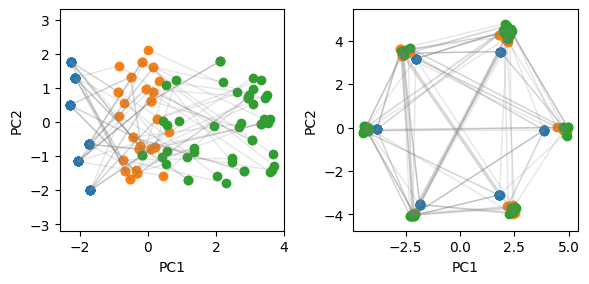

In [6]:
plt.figure(figsize = (6, 3))

for i in range(2):
    if i == 0:
        hiddens_selected = hiddens[:, :args.num_items, :] # get the first 3 stpes
    elif i == 1:
        hiddens_selected = hiddens[:, -args.num_items:, :] # get the last 3 stpes

    hiddens_selected = hiddens_selected.reshape(-1, args.hidden_size)

    pca = PCA(n_components = 2)
    hiddens_projected = pca.fit_transform(hiddens_selected)
    hiddens_projected = hiddens_projected.reshape((num_trials, args.num_items, 2))
    num_trials_to_plot = 50

    plt.subplot(1, 2, i + 1)

    for j in range(3):
        plt.scatter(hiddens_projected[:num_trials_to_plot, j, 0], hiddens_projected[:num_trials_to_plot, j, 1])

    for k in range(num_trials_to_plot):
        for t in range(args.num_items - 1):
            plt.plot(
                [hiddens_projected[k, t, 0], hiddens_projected[k, t + 1, 0]],
                [hiddens_projected[k, t, 1], hiddens_projected[k, t + 1, 1]], 
                color = 'gray', linewidth = 1, alpha = 0.2
            )
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.axis('equal')
    
plt.tight_layout()
plt.show()

In [7]:
# plt.figure(figsize = (6, 3))

# for i in range(2):
#     if i == 0:
#         keys_selected = keys[:, :args.num_items, :] # get the first 3 stpes
#     elif i == 1:
#         keys_selected = keys[:, -args.num_items:, :] # get the last 3 stpes

#     keys_selected = keys_selected.reshape(-1, args.key_size)

#     pca = PCA(n_components = 2)
#     keys_projected = pca.fit_transform(keys_selected)
#     keys_projected = keys_projected.reshape((num_trials, args.num_items, 2))
#     num_trials_to_plot = 50

#     plt.subplot(1, 2, i + 1)

#     for j in range(3):
#         plt.scatter(keys_projected[:num_trials_to_plot, j, 0], keys_projected[:num_trials_to_plot, j, 1])

#     for k in range(num_trials_to_plot):
#         for t in range(args.num_items - 1):
#             plt.plot(
#                 [keys_projected[k, t, 0], keys_projected[k, t + 1, 0]],
#                 [keys_projected[k, t, 1], keys_projected[k, t + 1, 1]], 
#                 color = 'gray', linewidth = 1, alpha = 0.2
#             )
#     plt.xlabel('PC1')
#     plt.ylabel('PC2')
#     plt.axis('equal')
    
# plt.tight_layout()
# plt.show()

In [8]:
# plt.figure(figsize = (6, 3))

# for i in range(2):
#     if i == 0:
#         queries_selected = queries[:, :args.num_items, :] # get the first 3 stpes
#     elif i == 1:
#         queries_selected = queries[:, -args.num_items:, :] # get the last 3 stpes

#     queries_selected = queries_selected.reshape(-1, args.key_size)

#     pca = PCA(n_components = 2)
#     queries_projected = pca.fit_transform(queries_selected)
#     queries_projected = queries_projected.reshape((num_trials, args.num_items, 2))
#     num_trials_to_plot = 50

#     plt.subplot(1, 2, i + 1)

#     for j in range(3):
#         plt.scatter(queries_projected[:num_trials_to_plot, j, 0], queries_projected[:num_trials_to_plot, j, 1])

#     for k in range(num_trials_to_plot):
#         for t in range(args.num_items - 1):
#             plt.plot(
#                 [queries_projected[k, t, 0], queries_projected[k, t + 1, 0]],
#                 [queries_projected[k, t, 1], queries_projected[k, t + 1, 1]], 
#                 color = 'gray', linewidth = 1, alpha = 0.2
#             )
#     plt.xlabel('PC1')
#     plt.ylabel('PC2')
#     plt.axis('equal')
    
# plt.tight_layout()
# plt.show()

In [9]:
for _ in data['hidden_seqs'][0]:
    print(_)

[ 0.66431904  0.51907307 -0.03899832 -0.54537725 -0.71797866 -0.53989506
  0.7025914  -0.3818866   0.79071915 -0.56058466 -0.5599303  -0.7933756
  0.62146664 -0.4573749   0.6621968   0.34050572 -0.59588957 -0.56696576
 -0.23912457 -0.44869065  0.12110183  0.5477581  -0.10102195  0.68163216
  0.43364584  0.1222397  -0.45855868  0.1912312  -0.5959578  -0.02055077
 -0.64725816  0.00880473]
[-0.7429126   0.8606988  -0.77511865 -0.813689   -0.64826435 -0.15183981
 -0.7833204   0.99453366 -0.9425866  -0.37710983  0.44844395 -0.10194631
 -0.05041136  0.95264894  0.9877202  -0.98795027  0.0432421  -0.8840146
  0.9563358   0.03851119  0.98433894  0.62526     0.97359467  0.9904561
 -0.91160166 -0.98038614 -0.4696901  -0.96220195  0.12670733  0.8915147
 -0.74304354 -0.4850308 ]
[ 0.06048234 -0.99328417 -0.9972477  -0.9989941   0.99848324 -0.9999992
 -0.9998108   0.8631378  -0.99996674 -0.6533923   0.81042     0.6814456
 -0.999991    0.9999751   0.99999386 -0.99999547  0.9390204  -0.99997777
  0.8